<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/17_k_NN_Machine_Learning_NumPy_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1 – Development of Basic Nearest Neighbour Algorithm**

The training set contains 4000 training instances, while the test set contains 1000 test instances.

Each instance is defined by a feature vector containing 10 feature values. The first 10 columns in both the training and test dataset correspond to the 10 features. 

All features are continuous valued features (there are no categorical features)

The 11th column, in the test and training dataset, contains the class. You will notice that this is a multi-class classification problem. There are three classes (1, 2 or 3).

The objective of part 1 of this assignment is to build a k-Nearest Neighbour (k-NN) algorithm (you should initially set k=1). Your algorithm should take as input a training and test dataset and will predict the appropriate class (1, 2 or 3).

The k-NN algorithm you develop for part 1 should use standard Euclidean distance for calculating the distance between query instances and the instances in the training data. It should report the overall accuracy of the algorithm as the percentage of test (query) instances classified correctly.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load data files.

In [0]:
import numpy as np

In [0]:
# Load training dataset
train_array = np.loadtxt('/content/drive/My Drive/000.Data/classification/trainingData.csv', delimiter = ',')

# Load test dataset
test_array = np.loadtxt('/content/drive/My Drive/000.Data/classification/testData.csv', delimiter = ',')

# Test loading of data

# print("Training dataset\n", train_array)

# print("\nTest dataset\n", test_array)

**Define function for calculating Euclidean Distance**

The function calculateDistances accept as arguments a single NumPy 2D array containing all the feature training data as well as a 1D NumPy array, containing a single query instance. As prescribed by the assignment, the function is developed using numpy without using ‘for loops’.

The function returns a NumPy array containing the distance from the query point to each of the individual training data instances. It also returns a second NumPy array containing the indices that would sort the distances array. The method argsort is used to sore the indices.

**calculateDistances**

The distance is calculated as the standard Euclidean distance.

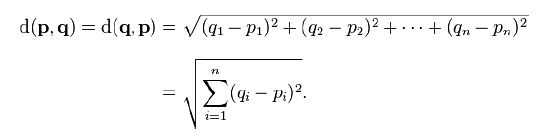

However, in order to calculate the distances, the numpy.linalg.norm function is used. 

The Euclidean distance / norm (also known as the L² norm) is just one of many different norms. The L² norm of a single vector is equivalent to the Euclidean distance from that point to the origin, and the L² norm of the difference between two vectors is equivalent to the Euclidean distance between the two points.

In [0]:
def calculateDistances(train, instance):
  # Modify order of np.linalg.norm to evaluate the performance of the classifier while using Euclidean distance and Manhattan Distance
  # Modify the numpy array slicing to test feature selection. Different features / column vectors can be used for distance determination for modeling
  # Assign weights to column vectors for having weigthed features for calculation of distances 
  distance = np.linalg.norm(train[:, :-1] - instance[:-1],  ord=2, axis=1)
  result = np.vstack((train.T, distance)).T
  sorted = np.argsort(distance)
  return result, sorted

In [0]:
# Test calculateDistances Function
instance = test_array[1]
calculateDistances(train_array, instance)

(array([[0.5301304 , 0.62645837, 0.44524917, ..., 0.61033772, 2.        ,
         0.54662896],
        [0.43333892, 0.46062429, 0.56937923, ..., 0.35859095, 0.        ,
         0.4939321 ],
        [0.60879428, 0.72451976, 0.2661216 , ..., 0.57226228, 2.        ,
         0.64804863],
        ...,
        [0.43723375, 0.5618769 , 0.56685036, ..., 0.4908792 , 2.        ,
         0.43982632],
        [0.62399617, 0.35529236, 0.49406175, ..., 0.46383661, 1.        ,
         0.34213352],
        [0.37743885, 0.39775421, 0.52465763, ..., 0.40968938, 2.        ,
         0.73020761]]), array([3337, 2946, 3417, ..., 2702, 2979, 2068]))

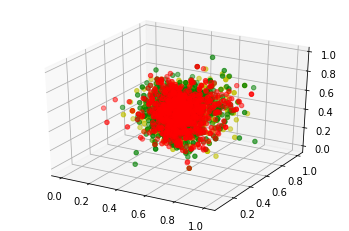

In [0]:
# this section is not really part of the solution, but was an attempt to visualize the first three vectors of a graph.

import matplotlib.pyplot as plt
X = []
for row in test_array:
  array, index = calculateDistances(train_array, row)
  for category in range(3):
      X.append([[], [], []])
      for i in index:
          if index[i] == category:
              X[category][0].append(array[i][0])
              X[category][1].append(array[i][1])
              X[category][2].append(array[i][2])
colours = ("r", "g", "y")
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')
for category in range(3):
    axis.scatter(X[category][0], X[category][1], X[category][2], c=colours[category])
plt.show()

**Making Predictions**

The function makes prediction of classes for the test dataset using the training data.

In [0]:
def predict(train, instance, k):
  array, index = calculateDistances(train, instance)
  knn = array[index[:k]]
  predict = np.argmax(np.bincount(knn[:,-2].astype(int)))
  return predict

# Test predict function
predict(train_array, test_array[4], 5)

2

**Determine accuracy of prediction of k-NN Algorithm**



In [0]:
for k in range(10):
  positive = 0
  for row in test_array:
    if predict(train_array, row, k+1) == row[-1].astype(int):
      positive += 1

  print("For k = ", k+1, " Accuracy of prediction: ", round(positive/np.shape(test_array)[0]*100,2))


For k =  1  Accuracy of prediction:  89.5
For k =  2  Accuracy of prediction:  89.2
For k =  3  Accuracy of prediction:  91.0
For k =  4  Accuracy of prediction:  92.0
For k =  5  Accuracy of prediction:  92.4
For k =  6  Accuracy of prediction:  92.3
For k =  7  Accuracy of prediction:  92.2
For k =  8  Accuracy of prediction:  91.8
For k =  9  Accuracy of prediction:  92.8
For k =  10  Accuracy of prediction:  92.2


**Part 2 – Investigating k-NN variants and hyper-parameters**

In [0]:
def dw_predict(train, instance, k):
  array, index = calculateDistances(train, instance)
  knn = array[index[:k]]
  inverse = np.reciprocal(knn[:,-1])
  sum = np.sum(inverse)
  wknn = np.vstack((knn.T, inverse/sum)).T
  cat_score = wknn[:, [-3, -1]]
  s0 = s1 = s2 = 0
  for i in cat_score:
    if i[0] == 2:
      s2 += i[1]
    elif i[0] == 1:
      s1 += i[1]
    else:
      s0 += i[1]
  max_weight = max(s0, s1, s2)
  if max_weight == s0:
    predict = 0
  elif max_weight == s1:
    predict = 1
  else:
    predict = 2
  return predict

# Test predict function
dw_predict(train_array, test_array[5], 20)


2

In [0]:
for k in range(10):
  positive = 0
  for row in test_array:
    if dw_predict(train_array, row, k+1) == row[-1].astype(int):
      positive += 1

  print("For k = ", k+1, " Accuracy of prediction: ", round(positive/np.shape(test_array)[0]*100,2))

For k =  1  Accuracy of prediction:  89.5
For k =  2  Accuracy of prediction:  89.5
For k =  3  Accuracy of prediction:  91.3
For k =  4  Accuracy of prediction:  92.1
For k =  5  Accuracy of prediction:  92.4
For k =  6  Accuracy of prediction:  92.4
For k =  7  Accuracy of prediction:  92.4
For k =  8  Accuracy of prediction:  92.6
For k =  9  Accuracy of prediction:  93.0
For k =  10  Accuracy of prediction:  92.7


**Model Evaluation & Confusion Matrix**

Though the assigment does not explicitly ask for a confusion matrix, the following function is written to produce a simple output that can be further used for evaluation purposes. 

The function is crude and has not been optimized for having built-in evaluation of models. Advanced python libraries, such as scikit-learn offers some of these robust functionalities.

In [0]:
def confusionmatrix(test, k):
    class_matrix = []
    confusion_matrix =[]    
    v00 = v01 = v02 = v10 = v11 = v12 = v20 = v21 = v22 = x00 = x01 = x10 = x11 = y00 = y01 = y10 = y11 = z00 = z01 = z10 = z11 = vpredict = actual = 0    
    for row in test:
    # Use predict for basic k-nn and dw_predict for weighted k-nn classifier  
      vpredict = dw_predict(train_array, row, k+1)
      actual = row[-1].astype(int)
    # Class Matrix  
      if ( vpredict == 0) and (actual == 0):
        v00 += 1
      elif (vpredict == 0) and (actual == 1):
        v01 += 1
      elif (vpredict == 0) and (actual == 2):
        v02 += 1
      if (vpredict == 1) and (actual == 0):
        v10 += 1
      elif (vpredict == 1) and (actual == 1):
        v11 += 1
      elif (vpredict == 1) and (actual == 2):
        v12 += 1
      if (vpredict == 2) and (actual == 0):
        v20 += 1
      elif (vpredict == 2) and (actual == 1):
        v21 += 1
      elif (vpredict == 2) and (actual == 2):
        v22 += 1
    
    # Confusion Matrix 
    
      if ( vpredict == 0) and (actual == 0):
        x00 += 1
      elif (vpredict == 0) and (actual != 0):
        x01 += 1
      elif (vpredict != 0) and (actual == 0):
        x10 += 1
      if (vpredict != 0) and (actual != 0):
        x11 += 1

      if ( vpredict == 1) and (actual == 1):
        y00 += 1
      elif (vpredict == 1) and (actual != 1):
        y01 += 1
      elif (vpredict != 1) and (actual == 1):
        y10 += 1
      if (vpredict != 1) and (actual != 1):
        y11 += 1

      if ( vpredict == 2) and (actual == 2):
        z00 += 1
      elif (vpredict == 2) and (actual != 2):
        z01 += 1
      elif (vpredict != 2) and (actual == 2):
        z10 += 1
      if (vpredict != 2) and (actual != 2):
        z11 += 1
            
    class_matrix.append((v00, v01, v02, v10, v11, v12, v20, v21, v22))
    confusion_matrix.append((x00, x01, x10, x11, y00, y01, y10, y11, z00, z01, z10, z11))


    return class_matrix, confusion_matrix

confusionmatrix(test_array, 10)

([(315, 29, 5, 14, 295, 6, 15, 12, 309)],
 [(315, 34, 29, 622, 295, 20, 41, 644, 309, 27, 11, 653)])

In [0]:
for k in range(10):  
  print("Input for Confusion Matrix for k =", k+1, confusionmatrix(test_array, k+1))


Input for Confusion Matrix for k = 1 ([(309, 32, 6, 18, 285, 13, 17, 19, 301)], [(309, 38, 35, 618, 285, 31, 51, 633, 301, 36, 19, 644)])
Input for Confusion Matrix for k = 2 ([(310, 26, 5, 17, 298, 10, 17, 12, 305)], [(310, 31, 34, 625, 298, 27, 38, 637, 305, 29, 15, 651)])
Input for Confusion Matrix for k = 3 ([(317, 24, 5, 14, 300, 11, 13, 12, 304)], [(317, 29, 27, 627, 300, 25, 36, 639, 304, 25, 16, 655)])
Input for Confusion Matrix for k = 4 ([(316, 24, 4, 13, 302, 10, 15, 10, 306)], [(316, 28, 28, 628, 302, 23, 34, 641, 306, 25, 14, 655)])
Input for Confusion Matrix for k = 5 ([(318, 24, 5, 11, 301, 10, 15, 11, 305)], [(318, 29, 26, 627, 301, 21, 35, 643, 305, 26, 15, 654)])
Input for Confusion Matrix for k = 6 ([(315, 25, 4, 13, 301, 8, 16, 10, 308)], [(315, 29, 29, 627, 301, 21, 35, 643, 308, 26, 12, 654)])
Input for Confusion Matrix for k = 7 ([(319, 25, 5, 12, 300, 8, 13, 11, 307)], [(319, 30, 25, 626, 300, 20, 36, 644, 307, 24, 13, 656)])
Input for Confusion Matrix for k = 8

**Part 3 – Developing k-NN for Regression Problems**

In [0]:

rtrain_array = np.loadtxt('/content/drive/My Drive/000.Data/regression/trainingData.csv', delimiter = ',')

# Load test dataset
rtest_array = np.loadtxt('/content/drive/My Drive/000.Data/regression/testData.csv', delimiter = ',')

# Test loading of data

# print("Training dataset\n", train_array)

# print("\nTest dataset\n", test_array)

In [0]:
def regression(train, instance, k):
  array, index = calculateDistances(train, instance)
  knn = array[index[:k]]
  predict = np.mean(knn[:,-2])
  mean = np.mean(array[:,-2])
  return predict, mean

# Test predict function
regression(rtrain_array, rtest_array[4], 3)

(86.73272418532163, -0.24511267634801212)

In [0]:
for k in range(10):
  residual = r_sum = 0
  se = se_sum = 0
  for row in rtest_array:
    predict, mean = regression(rtrain_array, row, k+1)
    residual = (row[-1] - predict)**2
    r_sum += residual
    se = (row[-1] - mean)**2
    se_sum += se

  print("For k = ", k+1, " R2: ", round(1 - (r_sum/se_sum),2))

For k =  1  R2:  0.67
For k =  2  R2:  0.79
For k =  3  R2:  0.82
For k =  4  R2:  0.83
For k =  5  R2:  0.84
For k =  6  R2:  0.84
For k =  7  R2:  0.84
For k =  8  R2:  0.84
For k =  9  R2:  0.85
For k =  10  R2:  0.85
